<a href="https://colab.research.google.com/github/Elijah-A-W/Natural-Language-Processing/blob/master/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import twitter_samples
from os import getcwd
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('twitter_sample')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading twitter_sample: Package 'twitter_sample' not
[nltk_data]     found in index


False

In [ ]:
train_v = pd.read_csv('/content/drive/MyDrive/Pytorch/Vaccinate or not/Train.csv')

test_v = pd.read_csv('/content/drive/MyDrive/Pytorch/Vaccinate or not/Test.csv')


**ABOUT THE DATA**

The data comes from tweets collected and classified through Crowdbreaks.org

Muller, Martin M., and Marcel Salathe. "Crowdbreaks: Tracking Health Trends Using Public Social Media Data and Crowdsourcing." Frontiers in public health 7 (2019).

Tweets have been classified as:

pro-vaccine (1)

neutral (0)

anti-vaccine (-1).

**OBJECTIVE OF THE DATA**

The objective of this challenge is to develop a machine learning model to assess if a twitter post that is related to vaccinations is positive, neutral, or negative. 

**Variable definition:**

    tweet_id: Unique identifier of the tweet

    safe_tweet: Text contained in the tweet. Some 

    label: Sentiment of the tweet (-1 for negative, 0 for neutral, 1 for positive)

    agreement: The tweets were labeled by three people 
    
    Agreement indicates the percentage of the three reviewers that agreed on the given label.

**Data Preprocessing**

In [ ]:
train_v.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

In [ ]:
 test_v.isnull().sum()

tweet_id     0
safe_text    1
dtype: int64

In [ ]:
train_v.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
train_v.columns

Index(['tweet_id', 'safe_text', 'label', 'agreement'], dtype='object')

In [ ]:
train_v.shape

(10001, 4)

In [ ]:
test_v.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [ ]:
test_v.shape

(5177, 2)

In [ ]:
 tr = train_v.dtypes
 te = test_v.dtypes
 print(tr,'\n')
 print(te)

tweet_id      object
safe_text     object
label        float64
agreement    float64
dtype: object 

tweet_id     object
safe_text    object
dtype: object


In [ ]:
trr = train_v.dropna()
test_v.dropna()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."
...,...,...
5172,ZXVVNC5O,jenny mccarthy is on new years rockin eve. wha...
5173,ZYIANVI8,Measles reported in Clark Co. for 1st time sin...
5174,ZYITEHAH,<user> issues alert regarding Measles in TX. K...
5175,ZZ3BMBTG,I can't believe people don't vaccinate their k...


In [ ]:
# trr.isnull().sum()


**Text Analysis**

WORD CLOUD FOR TRAIN SET


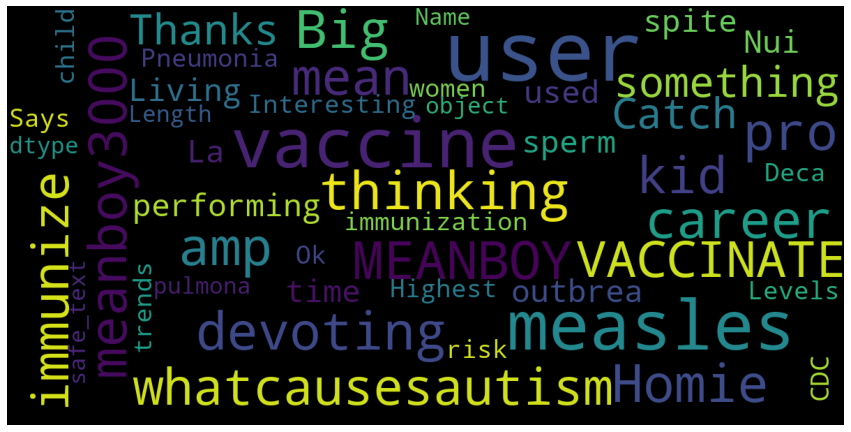



WORD CLOUD FOR TEST SET


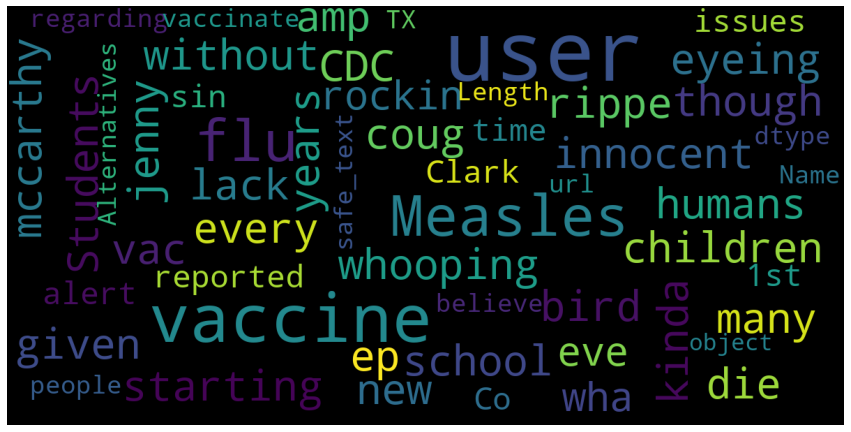

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords  
import matplotlib.pyplot as plt


stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
print('WORD CLOUD FOR TRAIN SET')
show_wordcloud(train_v['safe_text'])
print('\n')
print('WORD CLOUD FOR TEST SET')
show_wordcloud(test_v['safe_text'])


**From the observation.**

Most words talked about in relation to Vaccinating or not include,

**WITH VACCINATION RELATED**

Vaccinate, immunization, immunize, Vaccine

**WITH DESEASE RELATION**

Measles, outbreak, what causes Autism, Pneumonia

**OTHERS MAINLY TALKED**

MeanBoy3000, Meanwoman, User, Big, Living Length, CDC, HOMIE

In [ ]:
train_v['agreement'].value_counts()

1.000000    5866
0.666667    3894
0.333333     239
Name: agreement, dtype: int64

In [ ]:
#how many peole were agreeing to the sentiments labels given.

view_agrmnt = train_v['agreement'].value_counts().head()
trace = go.Bar(y=view_agrmnt.index[::-1],x=view_agrmnt.values[::-1],orientation = 'h',
               marker=dict(color=view_agrmnt.values[::-1],colorscale = 'Blues',reversescale = True))

layout = dict(title='AGREEMENT REVIEW ON THE GIVEN LABELS',)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="AGREEMENT REVIEWS")



**OBSERVATIONS FROM THE GRAPH**

The label 1 : 

Has many reviews close to 5866, meaning many people were taking the vaccination idea positively

Label 0.6-0.8: 

This has a sentiment of close to 3894 people who were still skeptical about the Vaccination

Label 0.2 - 0.5:

This indicates that few sentiments of 239 people were totaly negative towards the vaccination idea.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



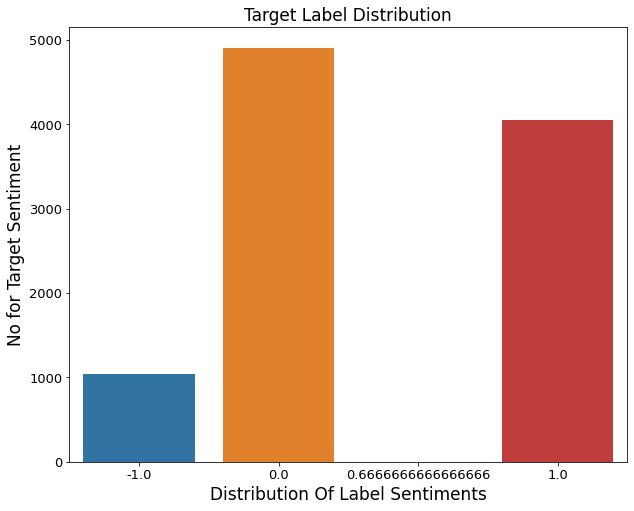

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.countplot(train_v['label'])
ax.set_xlabel(xlabel="Distribution Of Label Sentiments",fontsize=17)
ax.set_ylabel(ylabel='No for Target Sentiment',fontsize=17)
ax.axes.set_title('Target Label Distribution',fontsize=17)
ax.tick_params(labelsize=13)



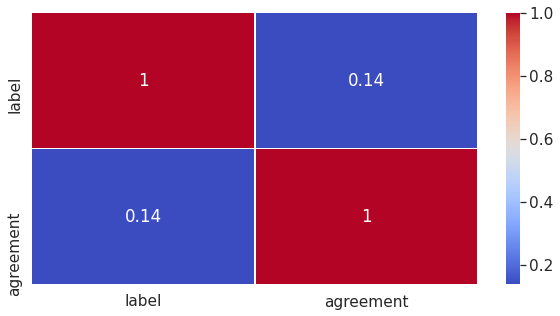

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(train_v.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

In [ ]:
all_texts = train_v['safe_text']
train_x = train_v['safe_text']
train_y = train_v['label']

In [ ]:
from scipy.sparse import hstack

**Cleaning and Preparing the Train SET**

In [ ]:
vectorize_words = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',
    stop_words='english',ngram_range=(1, 1),max_features=10000)

vectorize_words.fit(all_texts)
train_word_features = vectorize_words.transform(train_x)


# vectorize_char = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',stop_words='english',
#     ngram_range=(2, 6),max_features=50000)

# vectorize_char.fit(all_texts)
# train_char_features = vectorize_char.transform(train_x)

# cleaned_features = hstack([train_char_features, train_word_features])

In [ ]:
cleaned_features

<10001x60000 sparse matrix of type '<class 'numpy.float64'>'
	with 3783173 stored elements in COOrdinate format>

**Cleaning and Preparing the Test SET**

In [ ]:
test_x = test_v['safe_text']


**Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_word_features, train_y,test_size=0.3,random_state=101)



In [ ]:
trr.dtypes

tweet_id      object
safe_text     object
label        float64
agreement    float64
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

ValueError: ignored